# Create graph

## Import libraries

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

## number of colors

In [4]:
colors=[1,2,3,4,5,6]

## add nodes

In [8]:
nv=6

G=nx.Graph()
for i in range(1,nv+1):
    G.add_node(i)

## add edges

In [11]:
L=[[1, 2],[1, 3],[2, 3],[2,4],[5,4],[1,6],[3,5]]

for i in L:
    G.add_edge(i[0],i[1])

## Position nodes

In [14]:
# explicitly set positions POSICAO DOS MODOS
pos = {1: (0, 0), 2: (2, 0.3), 3: (2, 0), 4: (3,0.3),5:(3,0),6:(-3,0)}

## draw graph

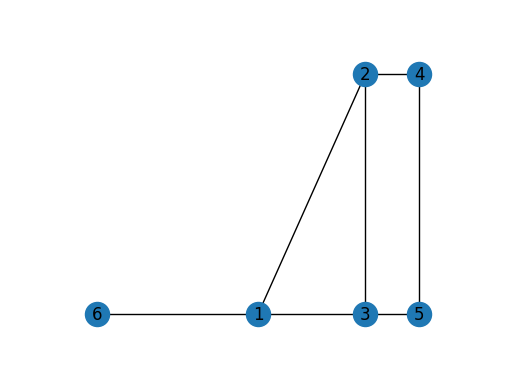

In [17]:
nx.draw_networkx(G, pos)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

## list of adjacent nodes

index is the node and the elements are the adjacent nodes

In [21]:
adj_t=[];
for j in range(1,nv+1):
    adj_t.append([n for n in G.neighbors(j)])
    
adj_t

[[2, 3, 6], [1, 3, 4], [1, 2, 5], [2, 5], [4, 3], [1]]

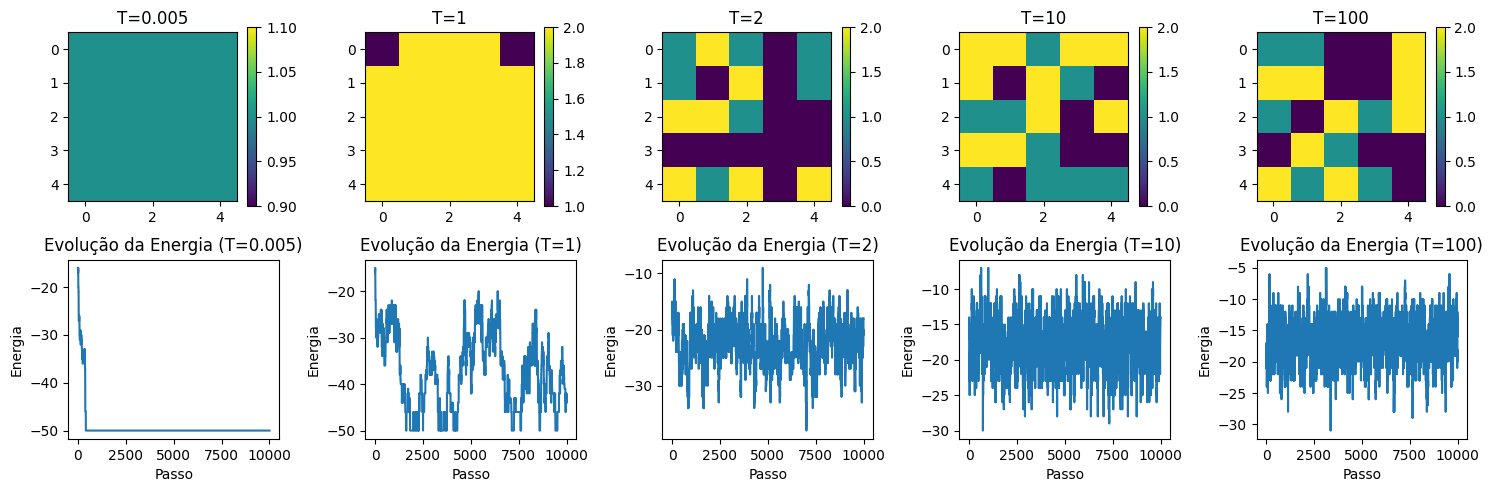

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular a energia do modelo de Potts
def energia(lattice, J):
    L = len(lattice)
    energy = 0
    for i in range(L):
        for j in range(L):
            # Soma sobre os vizinhos
            energy += -J * sum(lattice[i, j] == lattice[(i+dx)%L, (j+dy)%L] for dx, dy in [(1, 0), (0, 1)])
    return energy

# Função para realizar uma etapa do algoritmo de Metropolis
def passo_metropolis(lattice, J, T):
    L = len(lattice)
    beta = 1 / T
    i, j = np.random.randint(0, L), np.random.randint(0, L)
    delta_E = 2 * J * sum(lattice[i, j] == lattice[(i+dx)%L, (j+dy)%L] for dx, dy in [(1, 0), (0, 1)])
    if delta_E <= 0 or np.random.random() < np.exp(-beta * delta_E):
        lattice[i, j] = np.random.randint(0, q)  # Altera o spin aleatoriamente
    return lattice

# Função para realizar a simulação Monte Carlo
def simular(lattice, J, T, passos):
    energias = []
    for _ in range(passos):
        lattice = passo_metropolis(lattice, J, T)
        energias.append(energia(lattice, J))
    return lattice, energias

# Parâmetros da simulação
L = 5  # Tamanho da grade
q = 3  # Número de cores
J = 1  # Constante de acoplamento
temperaturas = [0.005, 1, 2,10,100]  # Temperaturas a serem simuladas
passos = 10000  # Número de passos de Monte Carlo

# Inicializa a grade com spins aleatórios
lattice = np.random.randint(0, q, size=(L, L))

# Realiza a simulação Monte Carlo para cada temperatura
plt.figure(figsize=(15, 5))
for i, T in enumerate(temperaturas):
    lattice_final, energias = simular(lattice.copy(), J, T, passos)
    
    # Plota a grade final e a evolução da energia
    plt.subplot(2, len(temperaturas), i+1)
    plt.imshow(lattice_final, cmap='viridis', interpolation='nearest')
    plt.title(f'T={T}')
    plt.colorbar()
    
    plt.subplot(2, len(temperaturas), len(temperaturas)+i+1)
    plt.plot(energias)
    plt.xlabel('Passo')
    plt.ylabel('Energia')
    plt.title(f'Evolução da Energia (T={T})')

plt.tight_layout()
plt.show()


In [24]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Função para calcular a Hamiltoniana para o modelo de Potts de duas cores
def hamiltonian_two_color(lattice, J):
    energy = 0
    L = len(lattice)
    for i in range(L):
        for j in range(L):
            # Soma sobre os vizinhos mais próximos
            energy += -J * (lattice[i][j] * lattice[(i+1)%L][j] + lattice[i][j] * lattice[i][(j+1)%L])
    return energy

# Função para calcular a Hamiltoniana para o modelo de Potts de três cores
def hamiltonian_three_color(lattice, J):
    energy = 0
    L = len(lattice)
    for i in range(L):
        for j in range(L):
            # Soma sobre os vizinhos mais próximos
            energy += -J * (lattice[i][j] * lattice[(i+1)%L][j] + lattice[i][j] * lattice[i][(j+1)%L] + 
                            lattice[i][j] * lattice[(i-1)%L][j] + lattice[i][j] * lattice[i][(j-1)%L])
    return energy

# Function to perform Monte Carlo simulation for two-color Potts model
def monte_carlo_two_color(lattice, J, T, steps):
    L = len(lattice)
    beta = 1 / T
    energies = []
    magnetizations = []
    for _ in range(steps):
        # Randomly choose a lattice site
        i, j = np.random.randint(0, L), np.random.randint(0, L)
        # Calculate energy change if spin at (i,j) is flipped
        delta_E = 2 * lattice[i][j] * (lattice[(i+1)%L][j] + lattice[i][(j+1)%L])
        # Metropolis algorithm: accept or reject the flip based on energy change
        if delta_E <= 0 or np.random.random() < np.exp(-beta * delta_E):
            lattice[i][j] *= -1
        energies.append(hamiltonian_two_color(lattice, J))
        magnetizations.append(magnetization(lattice))
    return lattice, energies, magnetizations

# Function to perform Monte Carlo simulation for three-color Potts model
def monte_carlo_three_color(lattice, J, T, steps):
    L = len(lattice)
    beta = 1 / T
    energies = []
    magnetizations = []
    for _ in range(steps):
        # Randomly choose a lattice site
        i, j = np.random.randint(0, L), np.random.randint(0, L)
        # Calculate energy change if spin at (i,j) is flipped
        delta_E = 2 * lattice[i][j] * (lattice[(i+1)%L][j] + lattice[i][(j+1)%L] + lattice[(i-1)%L][j] + lattice[i][(j-1)%L])
        # Metropolis algorithm: accept or reject the flip based on energy change
        if delta_E <= 0 or np.random.random() < np.exp(-beta * delta_E):
            lattice[i][j] = np.random.choice([-1, 0, 1])  # Three-color Potts model
        energies.append(hamiltonian_three_color(lattice, J))
        magnetizations.append(magnetization(lattice))
    return lattice, energies, magnetizations


# Função para calcular a magnetização
def magnetizacao(lattice):
    return np.sum(lattice)

# Função para converter a grade em um gráfico de NetworkX
def lattice_to_graph(lattice):
    G = nx.Graph()
    L = len(lattice)
    for i in range(L):
        for j in range(L):
            G.add_node((i, j), color=lattice[i][j])  # Define o atributo de cor para cada nó como o valor de spin
            if i < L - 1:
                G.add_edge((i, j), ((i+1)%L, j))
            if j < L - 1:
                G.add_edge((i, j), (i, (j+1)%L))
    return G

# Função principal para executar as simulações
def main():
    # Define parâmetros para as simulações
    lattice_sizes = [2, 5, 10]
    temperatures = [0.00000001, 10, 100]
    steps = 10000
    J = 1
    
    
    for L in lattice_sizes:
        for T in temperatures:
            # Inicializa a grade com spins aleatórios
            lattice_two_color = np.random.choice([1, 1], size=(L, L))
            lattice_three_color = np.random.choice([-1, 0, 1], size=(L, L))
            
            # Realiza as simulações de Monte Carlo
            lattice_two_color_final, energies_two_color, _ = monte_carlo_two_color(lattice_two_color.copy(), J, T, steps)
            lattice_three_color_final, energies_three_color, _ = monte_carlo_three_color(lattice_three_color.copy(), J, T, steps)
            
            # Converte as grades em grafos
            G_two_color = lattice_to_graph(lattice_two_color_final)
            G_three_color = lattice_to_graph(lattice_three_color_final)
            
            # Plotar os grafos e os gráficos de energia
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
            
            # Plotar o grafo para o modelo de duas cores
            nx.draw(G_two_color, pos=nx.spring_layout(G_two_color), ax=axs[0], node_color=list(nx.get_node_attributes(G_two_color, 'color').values()), cmap='viridis', with_labels=False)
            axs[0].set_title(f'Two-Color Potts Model (L={L}, T={T})')
            
            # Plotar o grafo para o modelo de três cores
            nx.draw(G_three_color, pos=nx.spring_layout(G_three_color), ax=axs[1], node_color=list(nx.get_node_attributes(G_three_color, 'color').values()), cmap='viridis', with_labels=False)
            axs[1].set_title(f'Three-Color Potts Model (L={L}, T={T})')
            
            # Plotar a evolução da energia
            axs[2].plot(energies_two_color, label='Two-Color Potts Model')
            axs[2].plot(energies_three_color, label='Three-Color Potts Model')
            axs[2].set_xlabel('Steps')
            axs[2].set_ylabel('Energy')
            axs[2].set_title('Energy Evolution')
            axs[2].legend()
            
            plt.tight_layout()
            plt.show()

if __name__ == "__main__":
    main()


NameError: name 'magnetization' is not defined

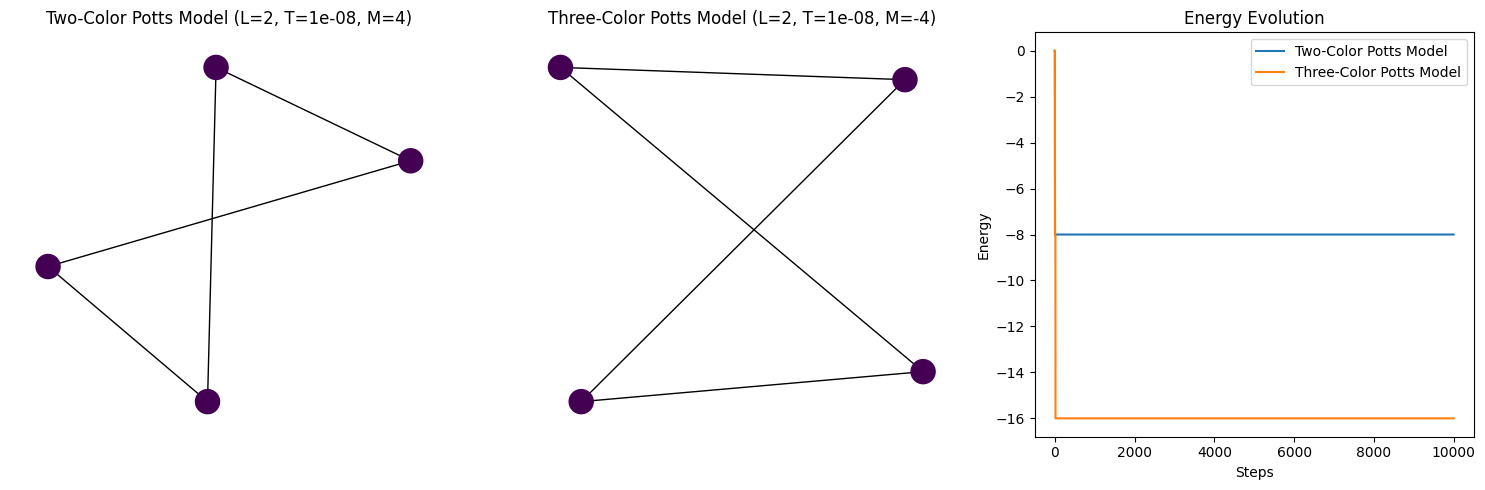

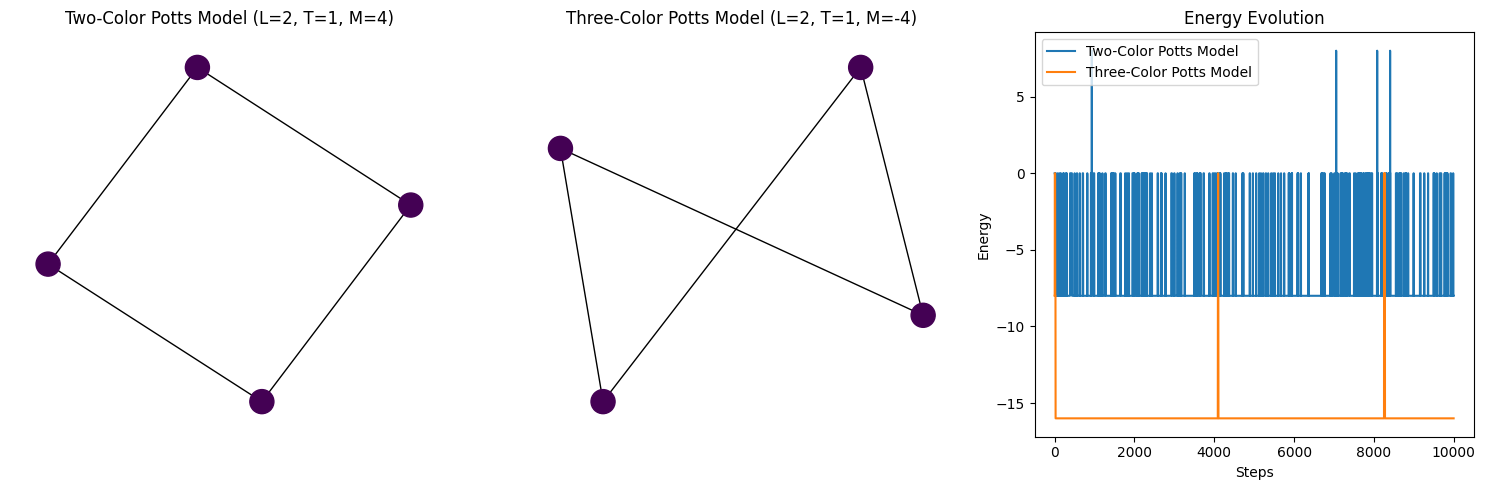

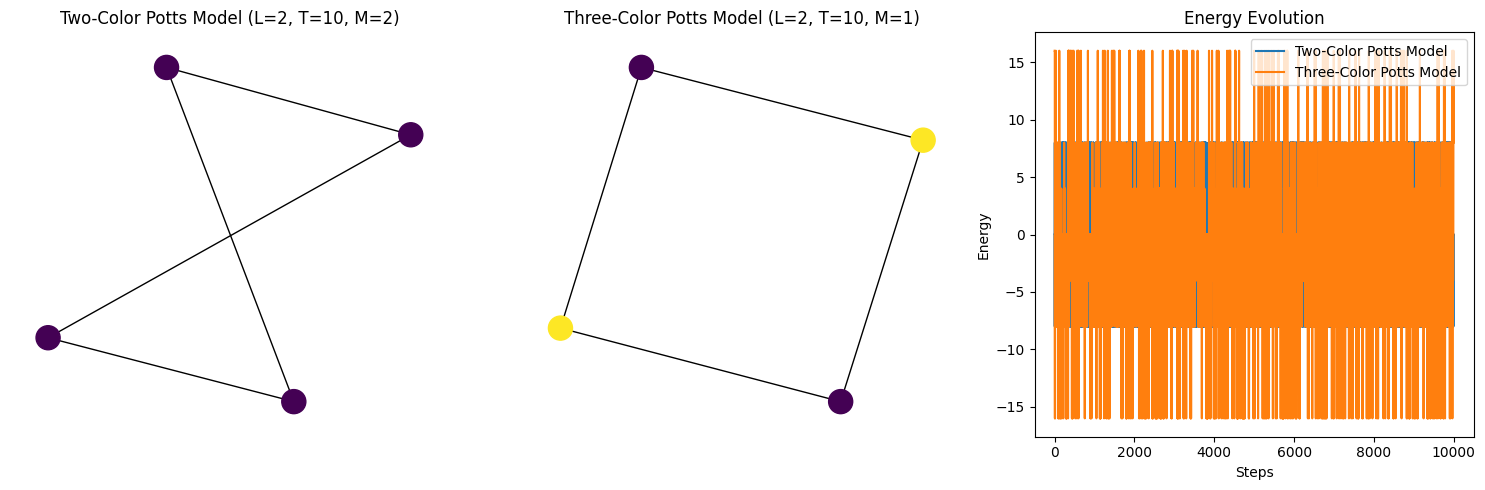

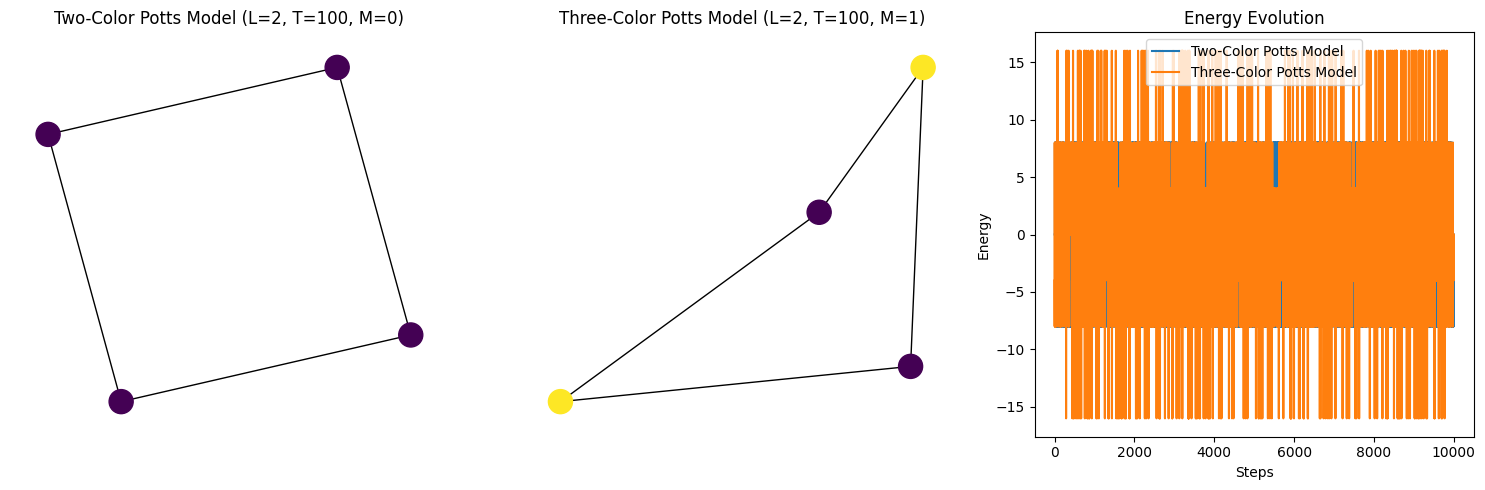

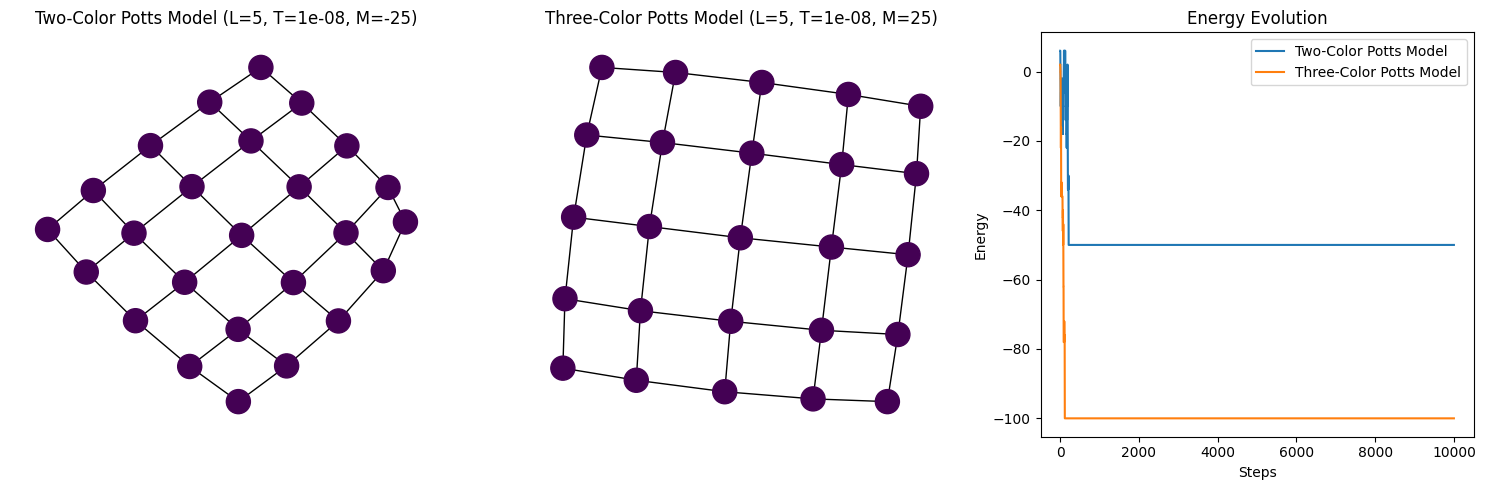

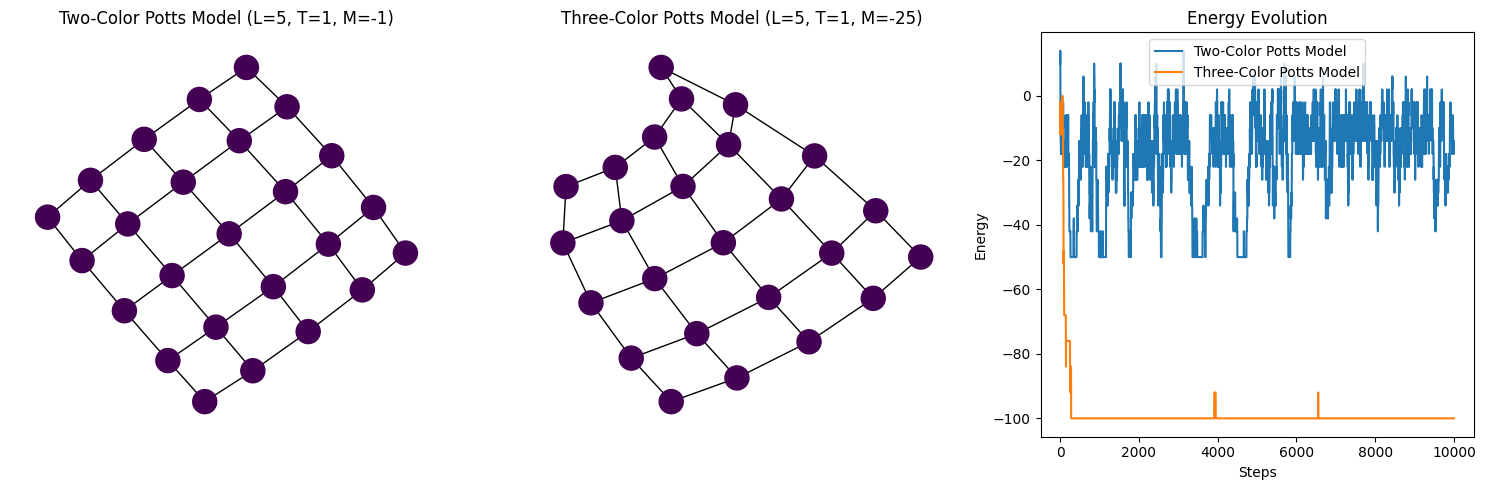

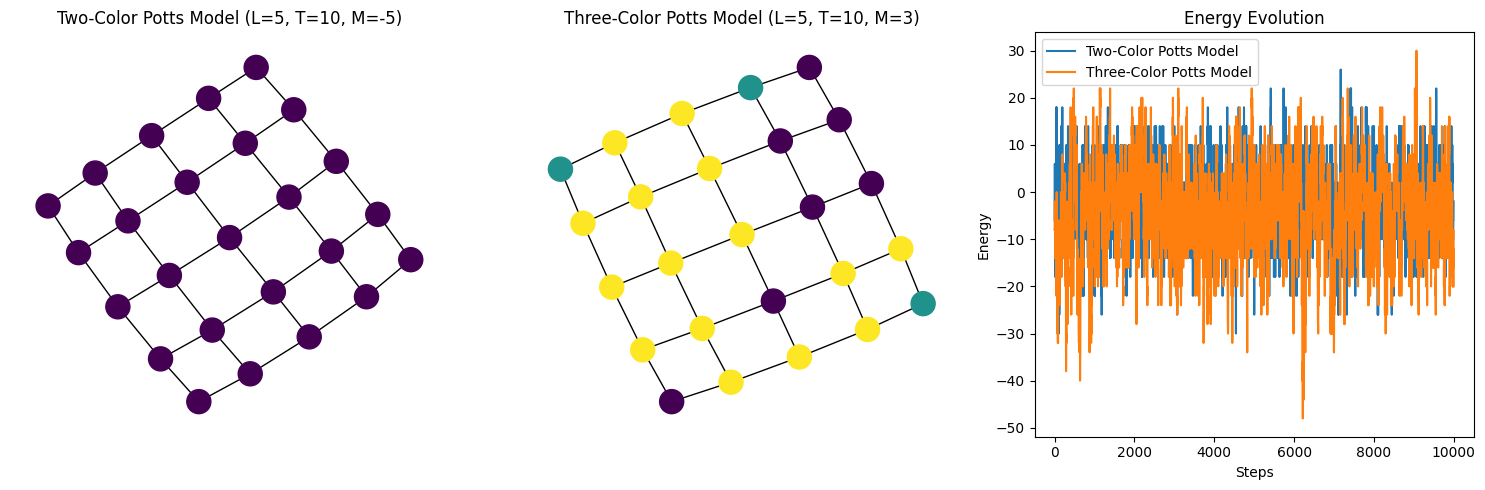

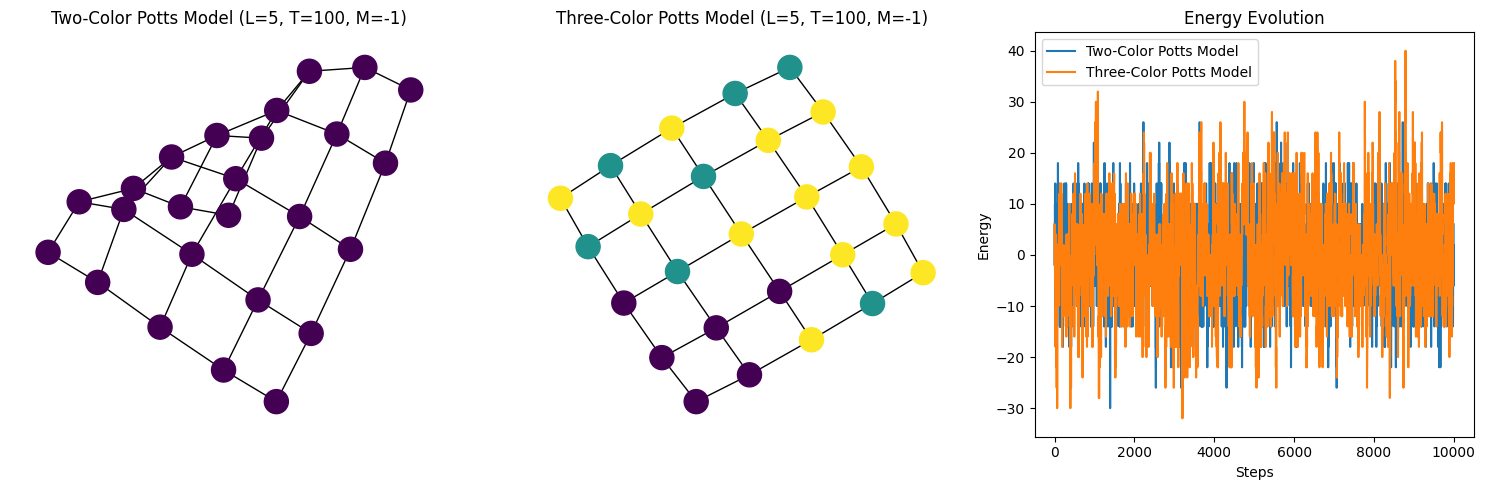

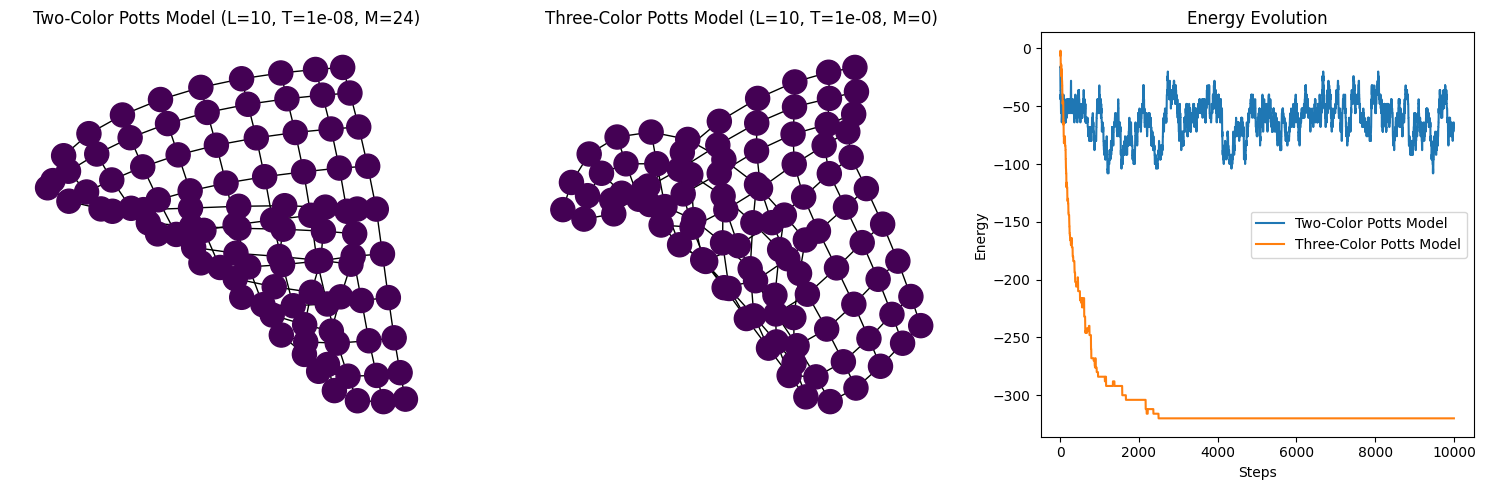

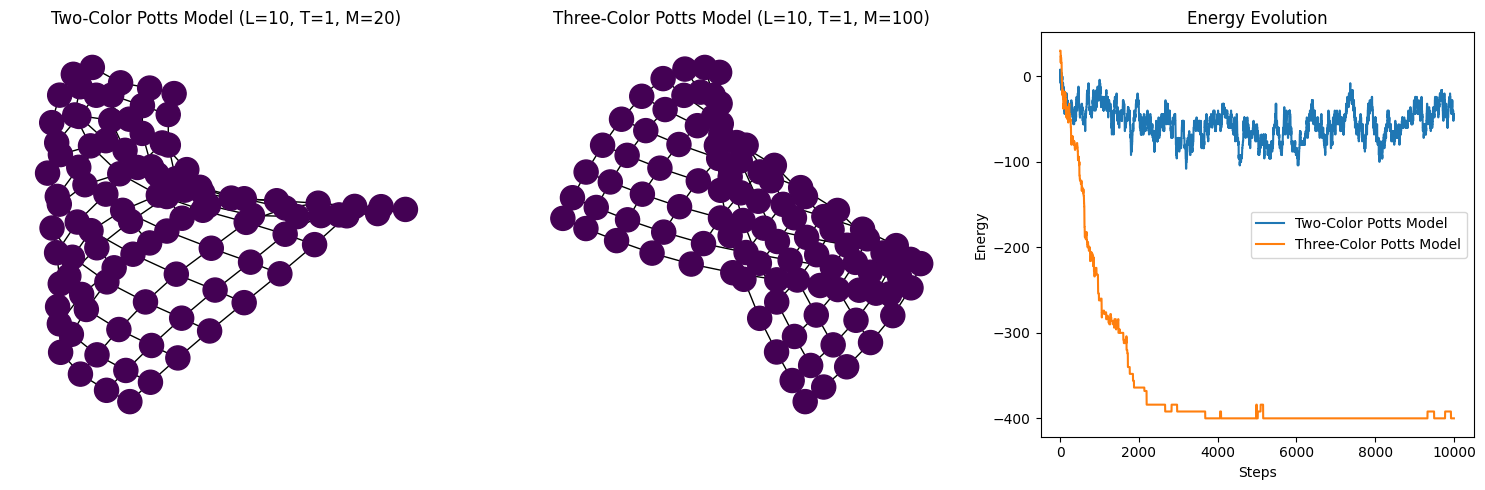

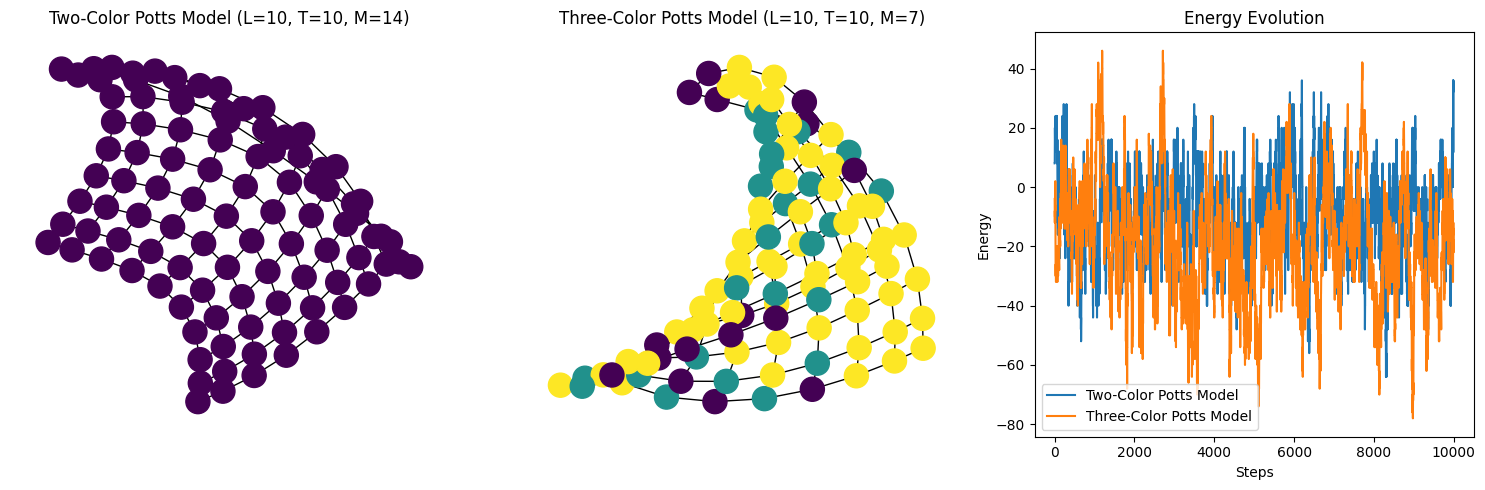

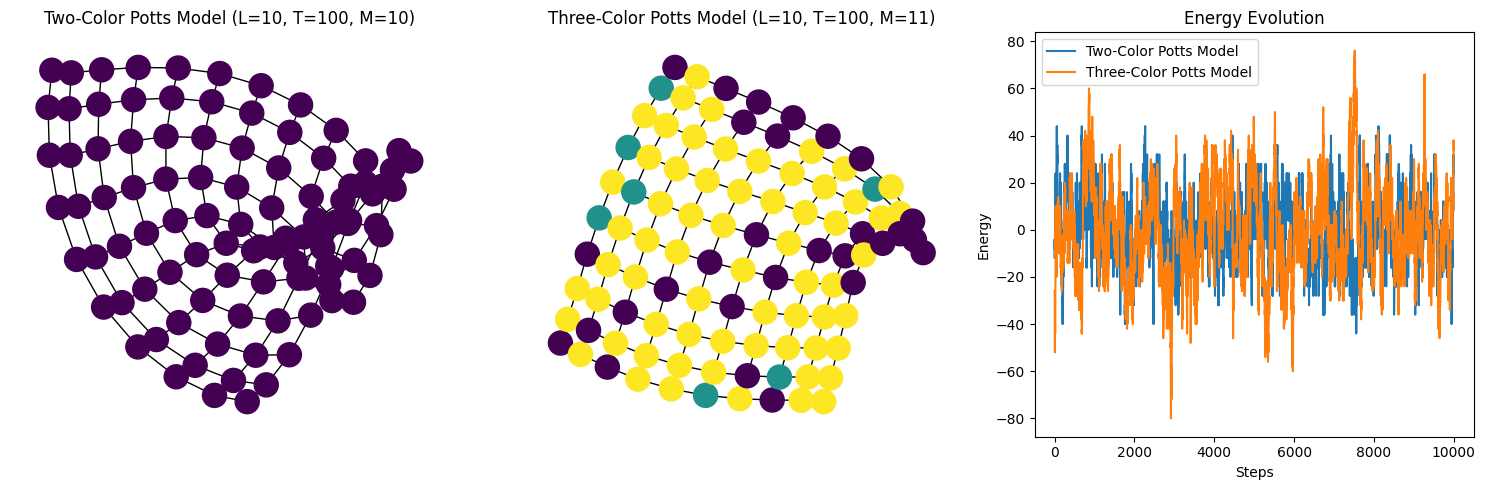

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Função para calcular Hamiltoniana para o modelo de Potts de duas cores
def hamiltonian_two_color(lattice, J):
    energy = 0
    L = len(lattice)
    for i in range(L):
        for j in range(L):
            # Soma sobre os vizinhos mais próximos
            energy += -J * (lattice[i][j] * lattice[(i+1)%L][j] + lattice[i][j] * lattice[i][(j+1)%L])
    return energy

# Função para calcular Hamiltoniana para o modelo de Potts de três cores
def hamiltonian_three_color(lattice, J):
    energy = 0
    L = len(lattice)
    for i in range(L):
        for j in range(L):
            # Soma sobre os vizinhos mais próximos
            energy += -J * (lattice[i][j] * lattice[(i+1)%L][j] + lattice[i][j] * lattice[i][(j+1)%L] + 
                            lattice[i][j] * lattice[(i-1)%L][j] + lattice[i][j] * lattice[i][(j-1)%L])
    return energy

# Função para realizar simulação de Monte Carlo para o modelo de Potts de duas cores
def monte_carlo_two_color(lattice, J, T, steps):
    L = len(lattice)
    beta = 1 / T
    energies = []
    for _ in range(steps):
        # Escolha aleatória de um sítio da rede
        i, j = np.random.randint(0, L), np.random.randint(0, L)
        # Calcula a mudança de energia se o spin em (i,j) for virado
        delta_E = 2 * lattice[i][j] * (lattice[(i+1)%L][j] + lattice[i][(j+1)%L])
        # Algoritmo de Metropolis: aceita ou rejeita a virada com base na mudança de energia
        if delta_E <= 0 or np.random.random() < np.exp(-beta * delta_E):
            lattice[i][j] *= -1
        energies.append(hamiltonian_two_color(lattice, J))
    return lattice, energies

# Função para realizar simulação de Monte Carlo para o modelo de Potts de três cores
def monte_carlo_three_color(lattice, J, T, steps):
    L = len(lattice)
    beta = 1 / T
    energies = []
    for _ in range(steps):
        # Escolha aleatória de um sítio da rede
        i, j = np.random.randint(0, L), np.random.randint(0, L)
        # Calcula a mudança de energia se o spin em (i,j) for virado
        delta_E = 2 * lattice[i][j] * (lattice[(i+1)%L][j] + lattice[i][(j+1)%L] + lattice[(i-1)%L][j] + lattice[i][(j-1)%L])
        # Algoritmo de Metropolis: aceita ou rejeita a virada com base na mudança de energia
        if delta_E <= 0 or np.random.random() < np.exp(-beta * delta_E):
            lattice[i][j] = np.random.choice([-1, 0, 1])  # Modelo de Potts de três cores
        energies.append(hamiltonian_three_color(lattice, J))
    return lattice, energies

# Função para calcular a magnetização
def magnetizacao(lattice):
    return np.sum(lattice)

# Função para converter a grade em um gráfico de NetworkX
def lattice_to_graph(lattice):
    G = nx.Graph()
    L = len(lattice)
    for i in range(L):
        for j in range(L):
            G.add_node((i, j), color=lattice[i][j])  # Define o atributo de cor para cada nó como o valor de spin
            if i < L - 1:
                G.add_edge((i, j), ((i+1)%L, j))
            if j < L - 1:
                G.add_edge((i, j), (i, (j+1)%L))
    return G

# Função para atribuir cores diferentes a cada nó do grafo
def assign_colors_to_nodes(G):
    color_map = {}  # Dicionário para mapear nós para cores
    for node in G.nodes():
        neighbor_colors = set()  # Conjunto para armazenar as cores dos vizinhos
        for neighbor in G.neighbors(node):
            neighbor_colors.add(G.nodes[neighbor]['color'])  # Adiciona a cor do vizinho ao conjunto
        # Encontra a menor cor disponível que não esteja no conjunto de cores dos vizinhos
        color = min(set(range(3)) - neighbor_colors)
        color_map[node] = color  # Atribui a cor ao nó
    # Define os atributos de cor dos nós
    nx.set_node_attributes(G, color_map, 'color')

# Função principal para executar as simulações
def main():
    # Define parâmetros para as simulações
    lattice_sizes = [2, 5, 10]
    temperatures = [0.00000001,1, 10, 100]
    steps = 10000
    J = 1
    
    for L in lattice_sizes:
        for T in temperatures:
            # Inicializa a grade com spins aleatórios
            lattice_two_color = np.random.choice([-1, 1], size=(L, L))
            lattice_three_color = np.random.choice([-1, 0, 1], size=(L, L))
            
            # Executa simulações de Monte Carlo
            lattice_two_color_final, energies_two_color = monte_carlo_two_color(lattice_two_color.copy(), J, T, steps)
            lattice_three_color_final, energies_three_color = monte_carlo_three_color(lattice_three_color.copy(), J, T, steps)
            
            # Calcula magnetização
            mag_two_color = magnetizacao(lattice_two_color_final)
            mag_three_color = magnetizacao(lattice_three_color_final)
            
            # Converte grades em gráficos NetworkX
            G_two_color = lattice_to_graph(lattice_two_color_final)
            G_three_color = lattice_to_graph(lattice_three_color_final)
            
            # Atribui cores diferentes a cada nó
            assign_colors_to_nodes(G_two_color)
            assign_colors_to_nodes(G_three_color)
            
            # Plota os gráficos de rede
            plt.figure(figsize=(15, 5))
            
            plt.subplot(1, 3, 1)
            nx.draw(G_two_color, pos=nx.spring_layout(G_two_color), node_color=[G_two_color.nodes[node]['color'] for node in G_two_color.nodes()], with_labels=False)
            plt.title(f'Two-Color Potts Model (L={L}, T={T}, M={mag_two_color})')
            
            plt.subplot(1, 3, 2)
            nx.draw(G_three_color, pos=nx.spring_layout(G_three_color), node_color=[G_three_color.nodes[node]['color'] for node in G_three_color.nodes()], with_labels=False)
            plt.title(f'Three-Color Potts Model (L={L}, T={T}, M={mag_three_color})')
            
            # Plota a evolução da energia
            plt.subplot(1, 3, 3)
            plt.plot(energies_two_color, label='Two-Color Potts Model')
            plt.plot(energies_three_color, label='Three-Color Potts Model')
            plt.xlabel('Steps')
            plt.ylabel('Energy')
            plt.title('Energy Evolution')
            plt.legend()
            
            plt.tight_layout()
            plt.show()

if __name__ == "__main__":
    main()


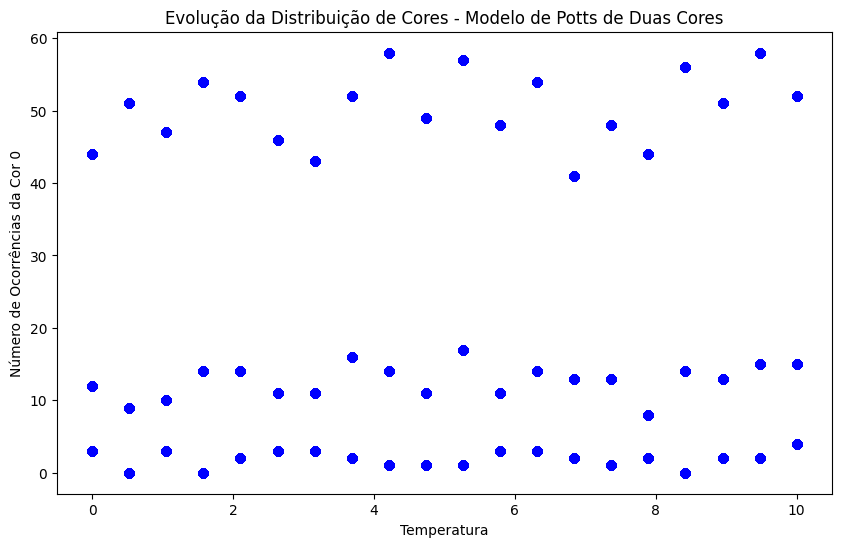

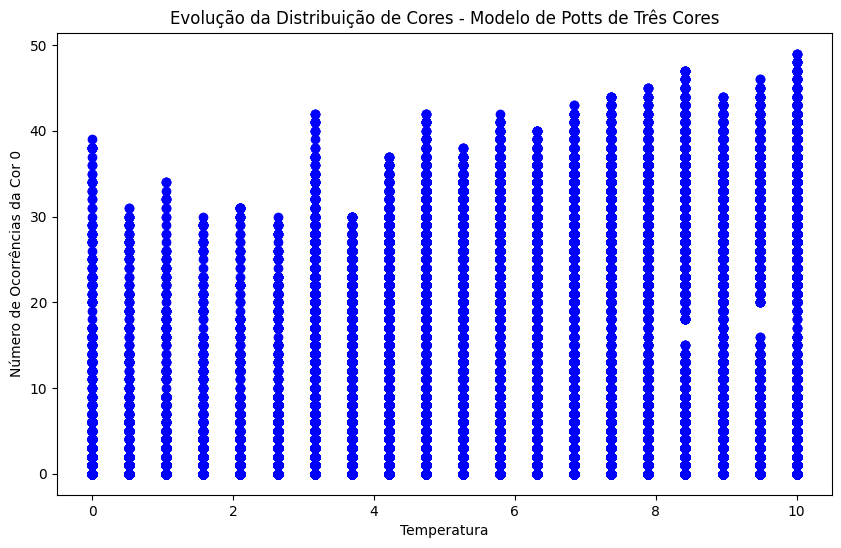

In [20]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Função para calcular Hamiltoniana para o modelo de Potts de duas cores
def hamiltonian_two_color(lattice, J):
    energy = 0
    L = len(lattice)
    for i in range(L):
        for j in range(L):
            # Soma sobre os vizinhos mais próximos
            energy += -J * (lattice[i][j] * lattice[(i+1)%L][j] + lattice[i][j] * lattice[i][(j+1)%L])
    return energy

# Função para calcular Hamiltoniana para o modelo de Potts de três cores
def hamiltonian_three_color(lattice, J):
    energy = 0
    L = len(lattice)
    for i in range(L):
        for j in range(L):
            # Soma sobre os vizinhos mais próximos
            energy += -J * (lattice[i][j] * lattice[(i+1)%L][j] + lattice[i][j] * lattice[i][(j+1)%L] + 
                            lattice[i][j] * lattice[(i-1)%L][j] + lattice[i][j] * lattice[i][(j-1)%L])
    return energy

# Função para realizar simulação de Monte Carlo para o modelo de Potts de duas cores
def monte_carlo_two_color(lattice, J, T, steps):
    L = len(lattice)
    beta = 1 / T
    energies = []
    colors = []  # Lista para armazenar as configurações de cores
    for _ in range(steps):
        # Escolha aleatória de um sítio da rede
        i, j = np.random.randint(0, L), np.random.randint(0, L)
        # Calcula a mudança de energia se o spin em (i,j) for virado
        delta_E = 2 * lattice[i][j] * (lattice[(i+1)%L][j] + lattice[i][(j+1)%L])
        # Algoritmo de Metropolis: aceita ou rejeita a virada com base na mudança de energia
        if delta_E <= 0 or np.random.random() < np.exp(-beta * delta_E):
            lattice[i][j] *= -1
        energies.append(hamiltonian_two_color(lattice, J))
        colors.append(lattice.copy())  # Salva a configuração atual das cores
    return lattice, energies, colors

# Função para realizar simulação de Monte Carlo para o modelo de Potts de três cores
def monte_carlo_three_color(lattice, J, T, steps):
    L = len(lattice)
    beta = 1 / T
    energies = []
    colors = []  # Lista para armazenar as configurações de cores
    for _ in range(steps):
        # Escolha aleatória de um sítio da rede
        i, j = np.random.randint(0, L), np.random.randint(0, L)
        # Calcula a mudança de energia se o spin em (i,j) for virado
        delta_E = 2 * lattice[i][j] * (lattice[(i+1)%L][j] + lattice[i][(j+1)%L] + lattice[(i-1)%L][j] + lattice[i][(j-1)%L])
        # Algoritmo de Metropolis: aceita ou rejeita a virada com base na mudança de energia
        if delta_E <= 0 or np.random.random() < np.exp(-beta * delta_E):
            lattice[i][j] = np.random.choice([-1, 0, 1])  # Modelo de Potts de três cores
        energies.append(hamiltonian_three_color(lattice, J))
        colors.append(lattice.copy())  # Salva a configuração atual das cores
    return lattice, energies, colors

# Função para calcular a magnetização
def magnetizacao(lattice):
    return np.sum(lattice)

# Função para converter a grade em um gráfico de NetworkX
def lattice_to_graph(lattice):
    G = nx.Graph()
    L = len(lattice)
    for i in range(L):
        for j in range(L):
            G.add_node((i, j), color=lattice[i][j])  # Define o atributo de cor para cada nó como o valor de spin
            if i < L - 1:
                G.add_edge((i, j), ((i+1)%L, j))
            if j < L - 1:
                G.add_edge((i, j), (i, (j+1)%L))
    return G

# Função para atribuir cores diferentes a cada nó do grafo
def assign_colors_to_nodes(G):
    color_map = {}  # Dicionário para mapear nós para cores
    for node in G.nodes():
        neighbor_colors = set()  # Conjunto para armazenar as cores dos vizinhos
        for neighbor in G.neighbors(node):
            neighbor_colors.add(G.nodes[neighbor]['color'])  # Adiciona a cor do vizinho ao conjunto
        available_colors = {0, 1} - neighbor_colors  # Cores disponíveis que ainda não estão nos vizinhos
        if available_colors:  # Verifica se há cores disponíveis
            color_map[node] = next(iter(available_colors))  # Atribui a próxima cor disponível ao nó
    nx.set_node_attributes(G, color_map, 'color')  # Define os atributos de cor para os nós do grafo


# Função principal para executar as simulações
def main():
    # Define os parâmetros para as simulações
    lattice_sizes = [2, 5, 10]
    temperatures = np.linspace(0.001, 10, 20)
    steps = 10000
    J = 1
    
    colors_two_color_evolution = {}  # Dicionário para armazenar a evolução da distribuição de cores para o modelo de duas cores
    colors_three_color_evolution = {}  # Dicionário para armazenar a evolução da distribuição de cores para o modelo de três cores
    
    for L in lattice_sizes:
        for T in temperatures:
            # Inicializa a grade com spins aleatórios
            lattice_two_color = np.random.choice([0, 1], size=(L, L))
            lattice_three_color = np.random.choice([0, 1, 2], size=(L, L))
            
            # Converte grades em gráficos NetworkX
            G_two_color = lattice_to_graph(lattice_two_color)
            G_three_color = lattice_to_graph(lattice_three_color)
            
            # Atribui cores diferentes a cada nó
            assign_colors_to_nodes(G_two_color)
            assign_colors_to_nodes(G_three_color)
            
            # Executa simulações de Monte Carlo
            lattice_two_color_final, energies_two_color, colors_two_color = monte_carlo_two_color(lattice_two_color.copy(), J, T, steps)
            lattice_three_color_final, energies_three_color, colors_three_color = monte_carlo_three_color(lattice_three_color.copy(), J, T, steps)
            
            # Calcula a magnetização
            mag_two_color = magnetizacao(lattice_two_color_final)
            mag_three_color = magnetizacao(lattice_three_color_final)
            
            # Salva a evolução das cores para esta temperatura
            colors_two_color_evolution[(L, T)] = colors_two_color
            colors_three_color_evolution[(L, T)] = colors_three_color
            
    # Plota a evolução da distribuição de cores ao longo da temperatura
    plt.figure(figsize=(10, 6))
    for (L, T), colors_two_color in colors_two_color_evolution.items():
        color_counts = [np.count_nonzero(color == 0) for color in colors_two_color]  # Conta o número de ocorrências de cada cor
        plt.plot([T] * len(color_counts), color_counts, 'bo')  # Plota a temperatura no eixo x e a contagem de cores no eixo y
    plt.xlabel('Temperatura')
    plt.ylabel('Número de Ocorrências da Cor 0')
    plt.title('Evolução da Distribuição de Cores - Modelo de Potts de Duas Cores')
    plt.show()

    plt.figure(figsize=(10, 6))
    for (L, T), colors_three_color in colors_three_color_evolution.items():
        color_counts = [np.count_nonzero(color == 0) for color in colors_three_color]  # Conta o número de ocorrências de cada cor
        plt.plot([T] * len(color_counts), color_counts, 'bo')  # Plota a temperatura no eixo x e a contagem de cores no eixo y
    plt.xlabel('Temperatura')
    plt.ylabel('Número de Ocorrências da Cor 0')
    plt.title('Evolução da Distribuição de Cores - Modelo de Potts de Três Cores')
    plt.show()

if __name__ == "__main__":
    main()
